In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Import Image
img1 = cv.imread('3.jpg')
img2 = cv.imread('3-1.jpg') # My Pic

# Convert them to Gray Scale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Used Gussian blured
blurred1 = cv.GaussianBlur(gray1, (5, 5), 0)
blurred2 = cv.GaussianBlur(gray2, (5, 5), 0)

## Method 1 :Using Classfication and Reducing number of Colors


In [3]:
# Detect edges using Canny edge detector
edges1 = cv.Canny(blurred1, 100, 200)
edges2 = cv.Canny(blurred2, 100, 200)
    
#  Apply threshold to obtain a binary image
ret1, mask1 = cv.threshold(edges1, 160, 255, cv.THRESH_BINARY_INV)
ret2, mask2 = cv.threshold(edges2, 160, 255, cv.THRESH_BINARY_INV)
    
#  Apply bilateral filter to reduce the number of colors while preserving edges
color1 = cv.bilateralFilter(img1, 9, 300, 300)
color2 = cv.bilateralFilter(img2, 9, 300, 300)
    
# Combine the edge mask with the reduced color image using bitwise_and
cartoon1 = cv.bitwise_and(color1, color1, mask=mask1)
cartoon2 = cv.bitwise_and(color2, color2, mask=mask2)


cartoon1_rgb = cv.cvtColor(cartoon1, cv.COLOR_BGR2RGB)
cartoon2_rgb = cv.cvtColor(cartoon2, cv.COLOR_BGR2RGB)

(-0.5, 405.5, 502.5, -0.5)

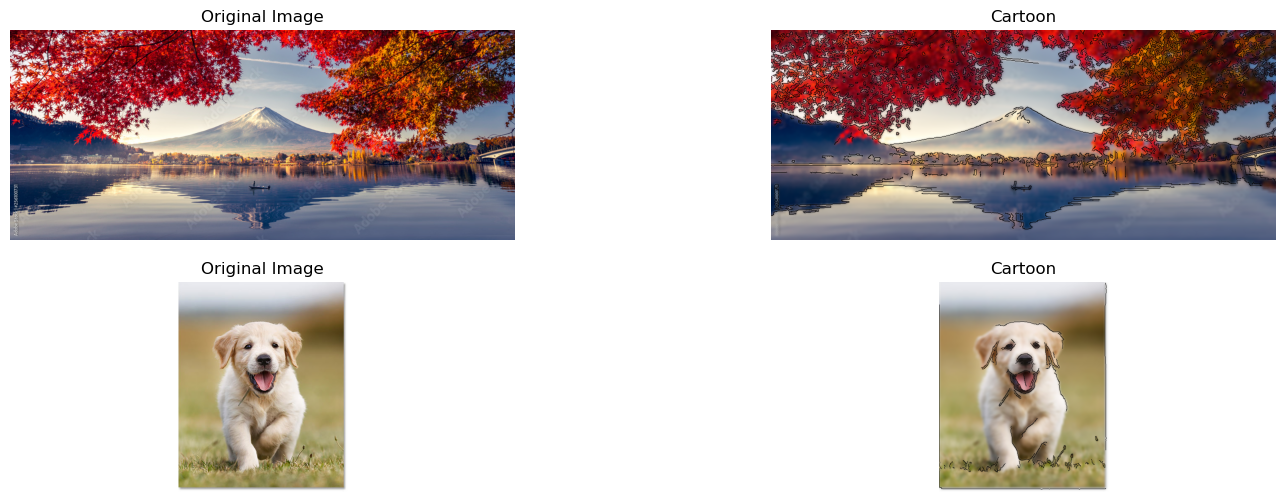

In [4]:
#Display Method 1

plt.figure(figsize=(18, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))   #Convert to RGB
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Cartoon')
plt.imshow(cv.cvtColor(cartoon1, cv.COLOR_BGR2RGB))  #Convert to RGB
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))  #Convert to RGB
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Cartoon')
plt.imshow(cv.cvtColor(cartoon2, cv.COLOR_BGR2RGB)) #Convert to RGB
plt.axis('off')

## Method 2 : Using  Median Filter


(-0.5, 405.5, 502.5, -0.5)

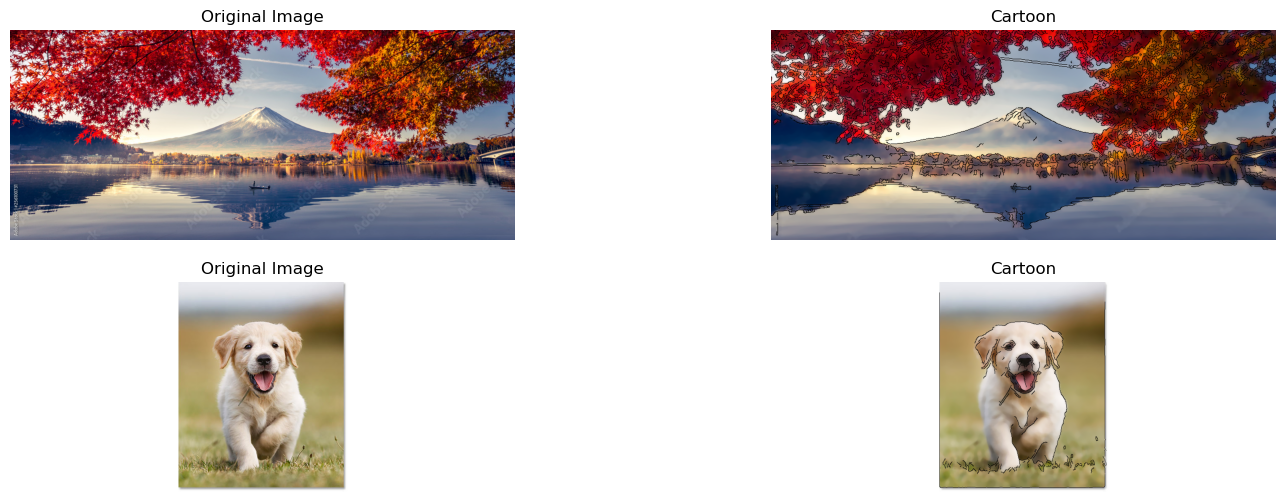

In [5]:
#Apply Median blur to reduce noise and preserve edges
blurred1 = cv.medianBlur(img1, 5)
blurred2 = cv.medianBlur(img2, 5)

#  Detect edges using Canny edge detector
edges1 = cv.Canny(blurred1, 100, 200)
edges2 = cv.Canny(blurred2, 100, 200)

# Apply threshold to obtain a binary image
ret1, mask1 = cv.threshold(edges1, 160, 255, cv.THRESH_BINARY_INV)
ret2, mask2 = cv.threshold(edges2, 160, 255, cv.THRESH_BINARY_INV)

# Apply Median filter to reduce the number of colors while preserving edges
color1 = cv.medianBlur(img1, 9)
color2 = cv.medianBlur(img2, 9)

#  Combine the edge mask with the reduced color image using bitwise AND
cartoon1 = cv.bitwise_and(color1, color1, mask=mask1)
cartoon2 = cv.bitwise_and(color2, color2, mask=mask2)


#Display Method 2

plt.figure(figsize=(18, 6))
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))   #Convert to RGB
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Cartoon')
plt.imshow(cv.cvtColor(cartoon1, cv.COLOR_BGR2RGB))  #Convert to RGB
plt.axis('off')


plt.subplot(2, 2, 3)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))  #Convert to RGB
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Cartoon')
plt.imshow(cv.cvtColor(cartoon2, cv.COLOR_BGR2RGB)) #Convert to RGB
plt.axis('off')